In [1]:
%cd /content/
!rm -rf convnet2
# Clonamos el repositorio
!git clone https://github.com/alvaro-neira/convnet2.git 

/content
Cloning into 'convnet2'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (421/421), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 421 (delta 271), reused 247 (delta 122), pack-reused 0
Receiving objects: 100% (421/421), 224.28 KiB | 1.95 MiB/s, done.
Resolving deltas: 100% (271/271), done.


## Preparación de los datos

In [2]:
# Crear directorios para datos y snapshots
!mkdir -p /content/convnet2/snapshots
!mkdir -p /content/convnet2/logs
!mkdir -p /content/convnet2/data

!ls convnet2

configs   models	      ssearch.py	     train_siamese.py
data	  README.md	      ssearch_with_merge.py  train_simple.py
datasets  release_siamese.py  test_tfrecords.py      utils
logs	  snapshots	      train.py


In [3]:
# Descargar y descomprimir los datos
%cd /content/convnet2/data
!wget https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa -O data.zip
!unzip -q -o data.zip
!unzip -q -o train_images.zip
!unzip -q -o test_images.zip
!rm data.zip
!rm train_images.zip
!rm test_images.zip
!ls

/content/convnet2/data
--2021-11-14 06:18:05--  https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa [following]
--2021-11-14 06:18:05--  https://www.dropbox.com/sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3832b87403b09d27ab7e1ed4d4.dl.dropboxusercontent.com/zip_download_get/A9WSwMKRM61p2-y3k_qETePWjaVkKdKz42BB14UaU9wsvIC41eY1_yXhWbljpbu3gkhCG6DghzJOjDaUHu22YYE1Nd5wDJjcnLKEBmdktzD2NQ# [following]
--2021-11-14 06:18:06--  https://uc3832b87403b09d27ab7e1ed4d4.dl.dropboxusercontent.com/zip_download_get/A9WSwMKRM61p2-y3k_qETePWjaVkKdKz42BB14UaU9wsvIC41eY1_yXhWbl

## Predicciones

A continuación, veremos algunas predicciones de ejemplo utilizando los pesos aprendidos por este último modelo. Para esto, copiaremos el último checkpoint desde Google Drive a la sesión de Colab (si no se ha cerrado la sesión desde el entrenamiento, este paso no será necesario). Podemos acceder al contenido de nuestro Drive con el botón "Activar unidad de Drive" en el menú de la izquierda.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


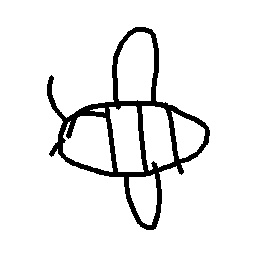

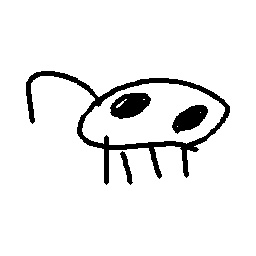

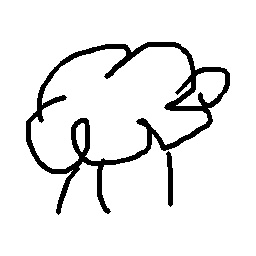

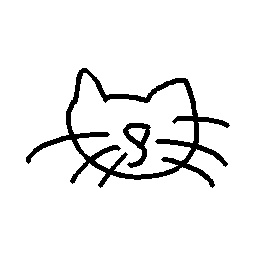

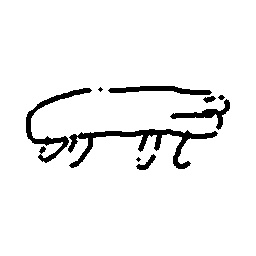

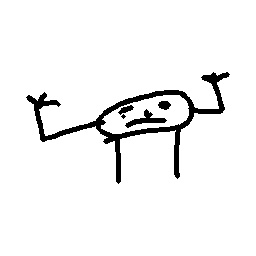

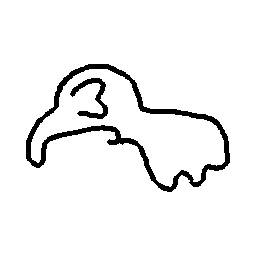

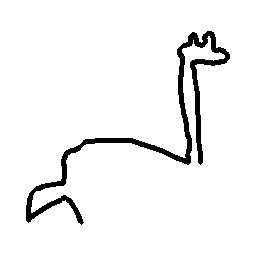

In [5]:
from IPython.display import Image, display

display(Image('/content/convnet2/data/test_images/bee/026_00119695.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/cow/081_00122082.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/sheep/258_00124921.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/cat/064_00122151.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/crocodile/084_00126855.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/crab/082_00125929.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/elephant/103_00125872.jpg', width=100, height=100))
display(Image('/content/convnet2/data/test_images/giraffe/129_00126181.jpg', width=100, height=100))

In [6]:
!mkdir -p /content/convnet2/data/sketch_folder


In [7]:
%cd /content/convnet2
!git fetch --all
!git checkout resnet34_prediction
!git pull origin resnet34_prediction
!cp /content/drive/MyDrive/tarea1/shape.dat /content/convnet2/data/sketch_folder/shape.dat
!cp /content/drive/MyDrive/tarea1/mean.dat /content/convnet2/data/sketch_folder/mean.dat
!python train_simple.py -mode predict -config configs/aneira_tfr.config -name SKETCH # no delay


/content/convnet2
Fetching origin
Branch 'resnet34_prediction' set up to track remote branch 'resnet34_prediction' from 'origin'.
Switched to a new branch 'resnet34_prediction'
From https://github.com/alvaro-neira/convnet2
 * branch            resnet34_prediction -> FETCH_HEAD
Already up to date.
2021-11-14 06:19:31.678621: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 clas

## Búsqueda por similitud



In [8]:
%cd /content/convnet2/data/sketch_folder

# Crear directorio para la búsqueda por similitud
!mkdir -p ssearch


/content/convnet2/data/sketch_folder


In [9]:
# Calculamos los feature vectors <1 minuto
%cd /content/convnet2/
!git fetch --all
!git checkout ssearch
!git pull origin ssearch
!cp /content/drive/MyDrive/tarea1/shape.dat data/sketch_folder/shape.dat
!cp /content/drive/MyDrive/tarea1/mean.dat data/sketch_folder/mean.dat
!cp /content/drive/MyDrive/tarea1/catalog.txt /content/convnet2/data/sketch_folder/ssearch/catalog.txt
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode compute

/content/convnet2
Fetching origin
Branch 'ssearch' set up to track remote branch 'ssearch' from 'origin'.
Switched to a new branch 'ssearch'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch    -> FETCH_HEAD
Already up to date.
2021-11-14 06:20:43.466615: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple             

In [10]:
# Búsqueda por similitud antigua
%cd /content/convnet2/
!git fetch --all
!git checkout ssearch
!git pull origin ssearch
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode search

/content/convnet2
Fetching origin
Already on 'ssearch'
Your branch is up to date with 'origin/ssearch'.
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch    -> FETCH_HEAD
Already up to date.
2021-11-14 06:21:36.456209: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple                  0 (unused)
                     

In [11]:
%cd /content/convnet2
!git fetch --all
!git checkout metrics
!git pull origin metrics
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode tarea1

/content/convnet2
Fetching origin
Branch 'metrics' set up to track remote branch 'metrics' from 'origin'.
Switched to a new branch 'metrics'
From https://github.com/alvaro-neira/convnet2
 * branch            metrics    -> FETCH_HEAD
Already up to date.
2021-11-14 06:23:31.072095: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple             

In [ ]:
# import numpy as np
# from ssearch import SSearch
# ssearch = SSearch('./configs/aneira_tfr.config', "SKETCH")
# ssearch.load_features()
# ssearch.filenames[:5]
